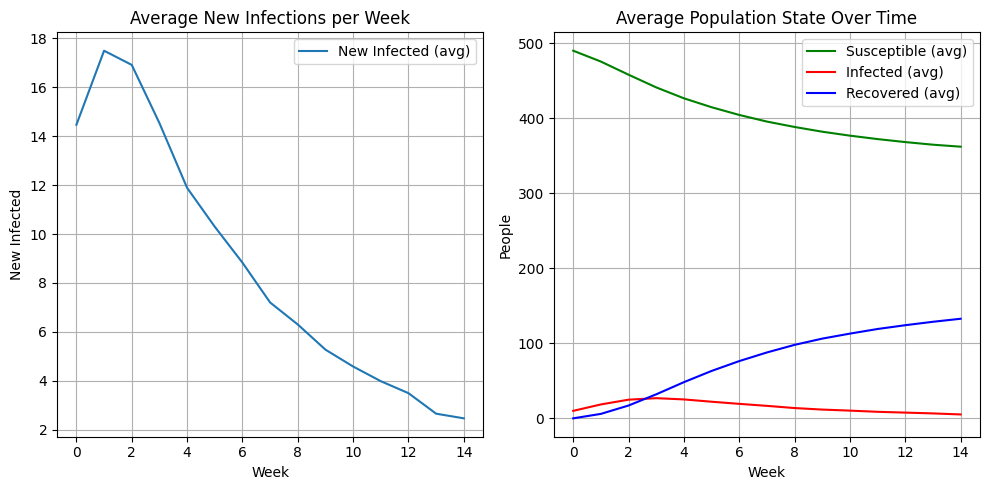

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Number of nodes
n_nodes = 500

# Create k-regular graph - modified to match homework requirement
def create_k_regular_graph(n, k):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Connect each node to k closest nodes (k/2 on each side)
    k_half = k // 2
    for i in range(n):
        for j in range(1, k_half + 1):
            # Forward connections
            forward = (i + j) % n
            G.add_edge(i, forward)
            # Backward connections
            backward = (i - j) % n
            G.add_edge(i, backward)

    return G

# Create the graph
G = create_k_regular_graph(n_nodes, k=6)  # Changed to k=6 as per homework

# Simulation parameters
beta = 0.25  # Changed to match homework
rho = 0.6    # Changed to match homework
weeks = 15
N = 100
inf_0 = 10

# Define infection function
def infection(n, infected, G, beta):
    # Number of infected neighbors
    m = len([nn for nn in G.neighbors(n) if nn in infected])
    # Infection probability
    p_inf = 1 - (1-beta)**m
    # Infected or not
    result = np.random.random() < p_inf
    return result

# Define recovery function
def recovery(rho):
    # Recovered or not
    result = np.random.random() < rho
    return result

# Initialize counters
n_new_inf = []
n_susc = []
n_inf = []
n_rec = []

# Perform the simulation N times
for i in range(N):
    # Randomly sample inf_0 infected
    first_inf = list(np.random.choice(G.nodes(), size=inf_0, replace=False))
    # Initialize infected list
    infected = first_inf.copy()
    # Initialize recovered list
    recovered = []
    # Initialize susceptible list
    susceptible = [n for n in G.nodes() if n not in infected and n not in recovered]

    # Weekly counts for this simulation
    sim_new_inf = []
    sim_susc = []
    sim_inf = []
    sim_rec = []

    # Simulate for weeks timesteps
    for _ in range(weeks):
        # Initialize new infected and recovered lists
        new_infected = []
        new_recovered = []

        # Check for new infections
        for n in susceptible:
            if infection(n, infected, G, beta):
                new_infected.append(n)

        # Check for recoveries
        for n in infected:
            if recovery(rho):
                new_recovered.append(n)

        # Store counts
        sim_new_inf.append(len(new_infected))
        sim_susc.append(len(susceptible))
        sim_inf.append(len(infected))
        sim_rec.append(len(recovered))

        # Update states
        infected = [n for n in infected + new_infected if n not in new_recovered]
        recovered = recovered + new_recovered
        susceptible = [n for n in susceptible if n not in new_infected]

    # Store this simulation's results
    n_new_inf.append(sim_new_inf)
    n_susc.append(sim_susc)
    n_inf.append(sim_inf)
    n_rec.append(sim_rec)

# Calculate averages
avg_new_inf = np.mean(n_new_inf, axis=0)
avg_susc = np.mean(n_susc, axis=0)
avg_inf = np.mean(n_inf, axis=0)
avg_rec = np.mean(n_rec, axis=0)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(weeks), avg_new_inf, label='New Infected (avg)')
plt.xlabel('Week')
plt.ylabel('New Infected')
plt.title('Average New Infections per Week')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(weeks), avg_susc, color='green', label='Susceptible (avg)')
plt.plot(range(weeks), avg_inf, color='red', label='Infected (avg)')
plt.plot(range(weeks), avg_rec, color='blue', label='Recovered (avg)')
plt.xlabel('Week')
plt.ylabel('People')
plt.title('Average Population State Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

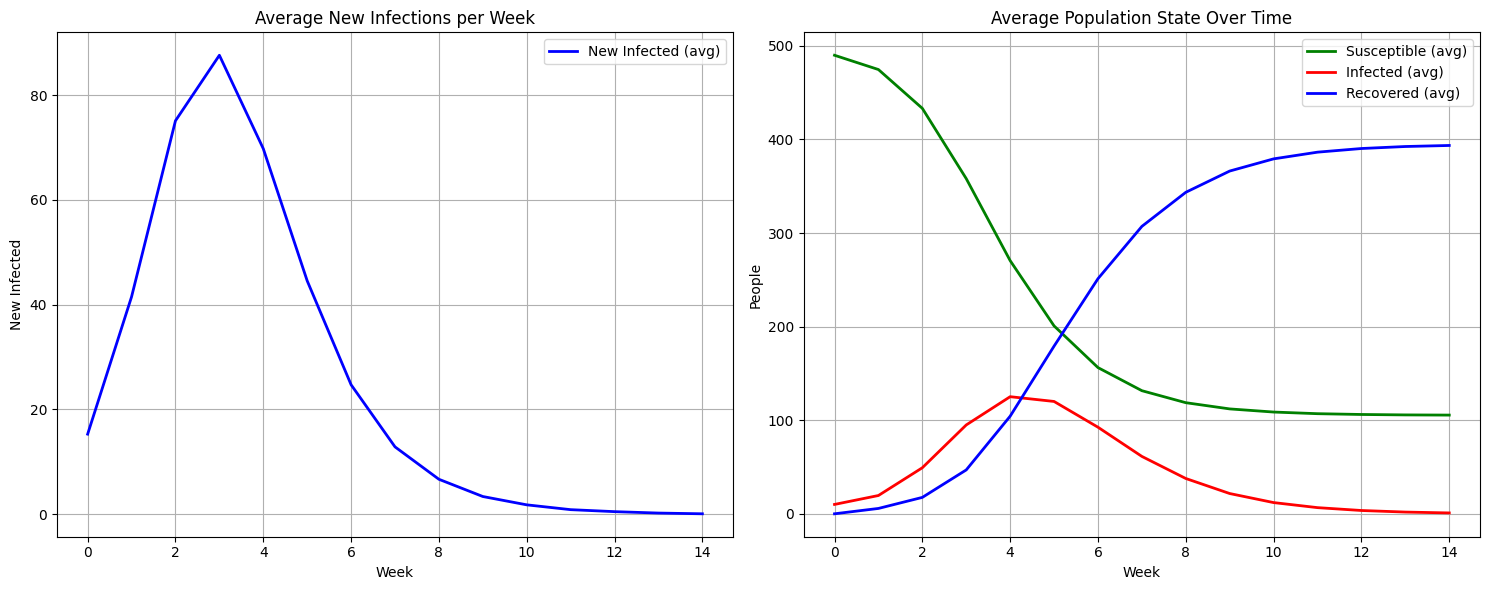

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def preferential_attachment(k, max_nodes):
    """Generate random graph using preferential attachment with target average degree k"""
    # Start with a complete graph of k+1 nodes
    G = nx.complete_graph(k + 1)
    c = k // 2  # Number of edges to add per new node

    # Add nodes until reaching max_nodes
    while len(G) < max_nodes:
        # Get current node degrees
        degrees = [d for _, d in G.degree()]
        # Calculate probabilities proportional to node degrees
        probs = np.array(degrees) / sum(degrees)

        # Add new node and connect to c existing nodes
        new_node = len(G)
        # Select nodes to connect to based on degree probabilities
        targets = np.random.choice(G.nodes(), size=c, replace=False, p=probs)
        G.add_node(new_node)
        G.add_edges_from([(new_node, target) for target in targets])

    return G

def infection(n, infected, G, beta):
    """Calculate if node n becomes infected based on infected neighbors"""
    # Count infected neighbors
    m = len([nn for nn in G.neighbors(n) if nn in infected])
    # Calculate infection probability
    p_inf = 1 - (1-beta)**m
    # Return infection result
    return np.random.random() < p_inf

def recovery(rho):
    """Calculate if infected node recovers"""
    return np.random.random() < rho

# Define number of nodes and average degree
k = 6
n_nodes = 500

# Generate random graph with preferential attachment model
G = preferential_attachment(k, n_nodes)

# Simulation parameters
beta = 0.25
rho = 0.6
weeks = 15
N = 100
inf_0 = 10

# Initialize counters of: new infected, susceptible, infected and recovered
n_new_inf = []
n_susc = []
n_inf = []
n_rec = []

# Perform the simulation N times
for i in range(N):
    # Randomly sample inf_0 infected
    first_inf = np.random.choice(G.nodes(), size=inf_0, replace=False)
    # Initialize infected vectors
    infected = first_inf
    # Initialize recovered vector
    recovered = []
    # Initialize susceptible vector
    susceptible = [n for n in G.nodes() if n not in infected and n not in recovered]

    # Weekly counts for this simulation
    sim_new_inf = []
    sim_susc = []
    sim_inf = []
    sim_rec = []

    # Simulate for weeks timesteps
    for _ in range(weeks):
        # Initialize new infected and new recovered vectors
        new_infected = []
        new_recovered = []

        # Apply infected function to each susceptible node
        for n in susceptible:
            if infection(n, infected, G, beta):
                new_infected.append(n)

        # Apply recovery function to each infected node
        for n in infected:
            if recovery(rho):
                new_recovered.append(n)

        # Store weekly counts
        sim_new_inf.append(len(new_infected))
        sim_susc.append(len(susceptible))
        sim_inf.append(len(infected))
        sim_rec.append(len(recovered))

        # Update states
        infected = [n for n in (list(infected) + new_infected) if n not in new_recovered]
        recovered = recovered + new_recovered
        susceptible = [n for n in susceptible if n not in new_infected]

    # Store simulation results
    n_new_inf.append(sim_new_inf)
    n_susc.append(sim_susc)
    n_inf.append(sim_inf)
    n_rec.append(sim_rec)

# Calculate averages
avg_new_inf = np.mean(np.reshape(n_new_inf,(N,weeks)),axis=0)
avg_susc = np.mean(np.reshape(n_susc,(N,weeks)),axis=0)
avg_inf = np.mean(np.reshape(n_inf,(N,weeks)),axis=0)
avg_rec = np.mean(np.reshape(n_rec,(N,weeks)),axis=0)

# Create subplots in a single figure
plt.figure(figsize=(15, 6))

# Plot new infections
plt.subplot(1, 2, 1)
plt.plot(range(weeks), avg_new_inf, 'b-', linewidth=2, label='New Infected (avg)')
plt.xlabel('Week')
plt.ylabel('New Infected')
plt.title('Average New Infections per Week')
plt.grid(True)
plt.legend()

# Plot population states
plt.subplot(1, 2, 2)
plt.plot(range(weeks), avg_susc, color='green', linewidth=2, label='Susceptible (avg)')
plt.plot(range(weeks), avg_inf, color='red', linewidth=2, label='Infected (avg)')
plt.plot(range(weeks), avg_rec, color='blue', linewidth=2, label='Recovered (avg)')
plt.xlabel('Week')
plt.ylabel('People')
plt.title('Average Population State Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('pandemic_simulation.svg', dpi=180)
plt.close()

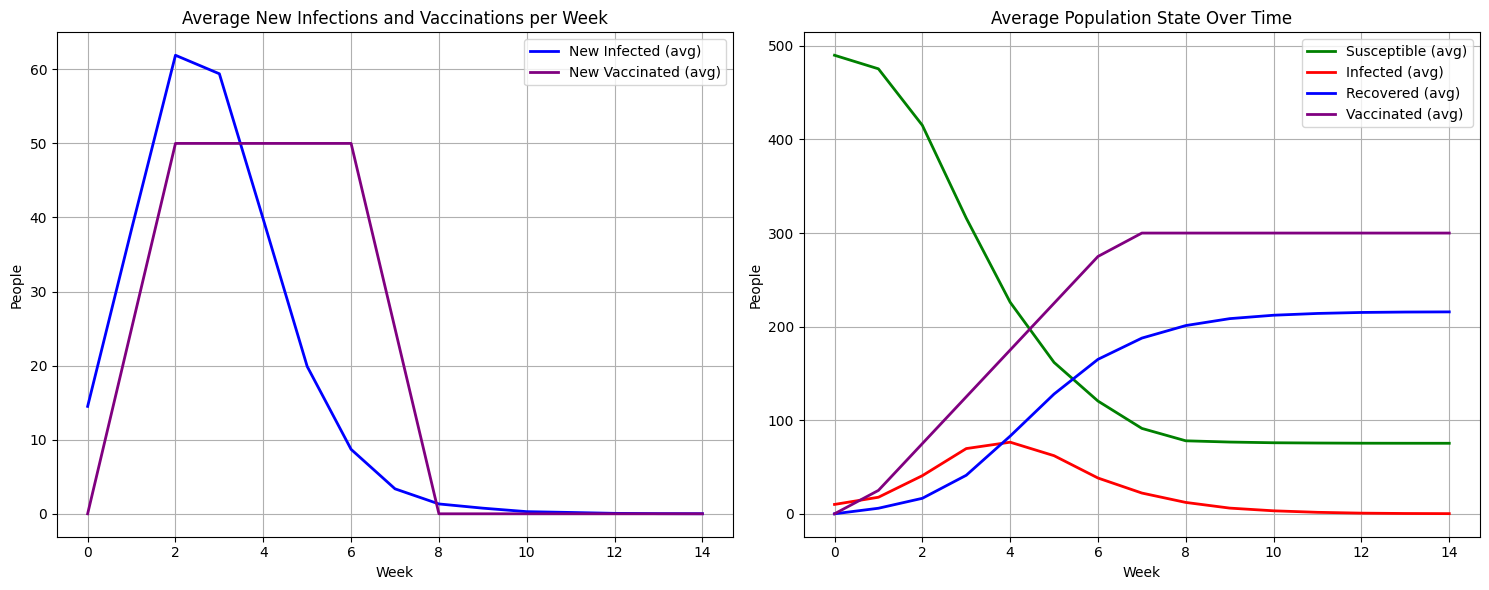

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define number of nodes and average degree
k = 6
n_nodes = 500

# Generate random graph with preferential attachment model
G = preferential_attachment(k, n_nodes)

# Simulation parameters
beta = 0.25
rho = 0.6
weeks = 15
N = 100
inf_0 = 10

# Vaccinated percentage per week according to homework
vaccinated_perc = [0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]

# Initialize counters
n_new_inf = []
n_new_vax = []
n_susc = []
n_inf = []
n_rec = []
n_vax = []

# Perform the simulation N times
for i in range(N):
    # Randomly sample inf_0 infected
    first_inf = np.random.choice(G.nodes(), size=inf_0, replace=False)
    # Initialize vectors
    infected = first_inf
    recovered = []
    susceptible = [n for n in G.nodes() if n not in infected and n not in recovered]
    vaccinable = [n for n in G.nodes()]
    vaccinated = []

    # Weekly counts for this simulation
    sim_new_inf = []
    sim_new_vax = []
    sim_susc = []
    sim_inf = []
    sim_rec = []
    sim_vax = []

    # Simulate for weeks timesteps
    for ii in range(weeks):
        # Initialize new vectors
        new_infected = []
        new_recovered = []

        # Calculate number to vaccinate this week
        current_vacc_percentage = vaccinated_perc[ii]
        target_vaccinated = int(n_nodes * current_vacc_percentage / 100)
        num_new_vax = max(0, target_vaccinated - len(vaccinated))

        # Select nodes to vaccinate
        if num_new_vax > 0 and vaccinable:
            new_vax = list(np.random.choice(vaccinable, size=min(num_new_vax, len(vaccinable)), replace=False))
        else:
            new_vax = []

        # Update infected vector (vaccinated can't infect others)
        infected = [i for i in infected if i not in new_vax]

        # Update vaccinated vector
        vaccinated.extend(new_vax)

        # Process infections
        for n in susceptible:
            if infection(n, infected, G, beta):
                new_infected.append(n)

        # Process recoveries
        for n in infected:
            if recovery(rho):
                new_recovered.append(n)

        # Store weekly counts
        sim_new_inf.append(len(new_infected))
        sim_new_vax.append(len(new_vax))
        sim_susc.append(len(susceptible))
        sim_inf.append(len(infected))
        sim_rec.append(len(recovered))
        sim_vax.append(len(vaccinated))

        # Update states
        infected = [n for n in (list(infected) + new_infected) if n not in new_recovered]
        recovered.extend(new_recovered)
        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered and n not in new_vax]
        vaccinable = [n for n in vaccinable if n not in vaccinated]

    # Store simulation results
    n_new_inf.append(sim_new_inf)
    n_new_vax.append(sim_new_vax)
    n_susc.append(sim_susc)
    n_inf.append(sim_inf)
    n_rec.append(sim_rec)
    n_vax.append(sim_vax)

# Calculate averages
avg_new_inf = np.mean(n_new_inf, axis=0)
avg_new_vax = np.mean(n_new_vax, axis=0)
avg_susc = np.mean(n_susc, axis=0)
avg_inf = np.mean(n_inf, axis=0)
avg_rec = np.mean(n_rec, axis=0)
avg_vax = np.mean(n_vax, axis=0)

# Create visualization
plt.figure(figsize=(15, 6))

# Plot new infections and vaccinations
plt.subplot(1, 2, 1)
plt.plot(range(weeks), avg_new_inf, 'b-', linewidth=2, label='New Infected (avg)')
plt.plot(range(weeks), avg_new_vax, 'purple', linewidth=2, label='New Vaccinated (avg)')
plt.xlabel('Week')
plt.ylabel('People')
plt.title('Average New Infections and Vaccinations per Week')
plt.grid(True)
plt.legend()

# Plot population states
plt.subplot(1, 2, 2)
plt.plot(range(weeks), avg_susc, 'g-', linewidth=2, label='Susceptible (avg)')
plt.plot(range(weeks), avg_inf, 'r-', linewidth=2, label='Infected (avg)')
plt.plot(range(weeks), avg_rec, 'b-', linewidth=2, label='Recovered (avg)')
plt.plot(range(weeks), avg_vax, 'purple', linewidth=2, label='Vaccinated (avg)')
plt.xlabel('Week')
plt.ylabel('People')
plt.title('Average Population State Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()  # Display the plot

# Save the plots
plt.savefig('Ex1_3.svg', dpi=180)
plt.savefig('Ex1_3a.svg', dpi=180)  # Save as in original code
plt.savefig('Ex1_3b.svg', dpi=180)  # Save as in original code
plt.close()

Lowest RMSE: 12.90279039587949 obtained with params: k = 12, beta = 0.19999999999999998, rho = 0.5


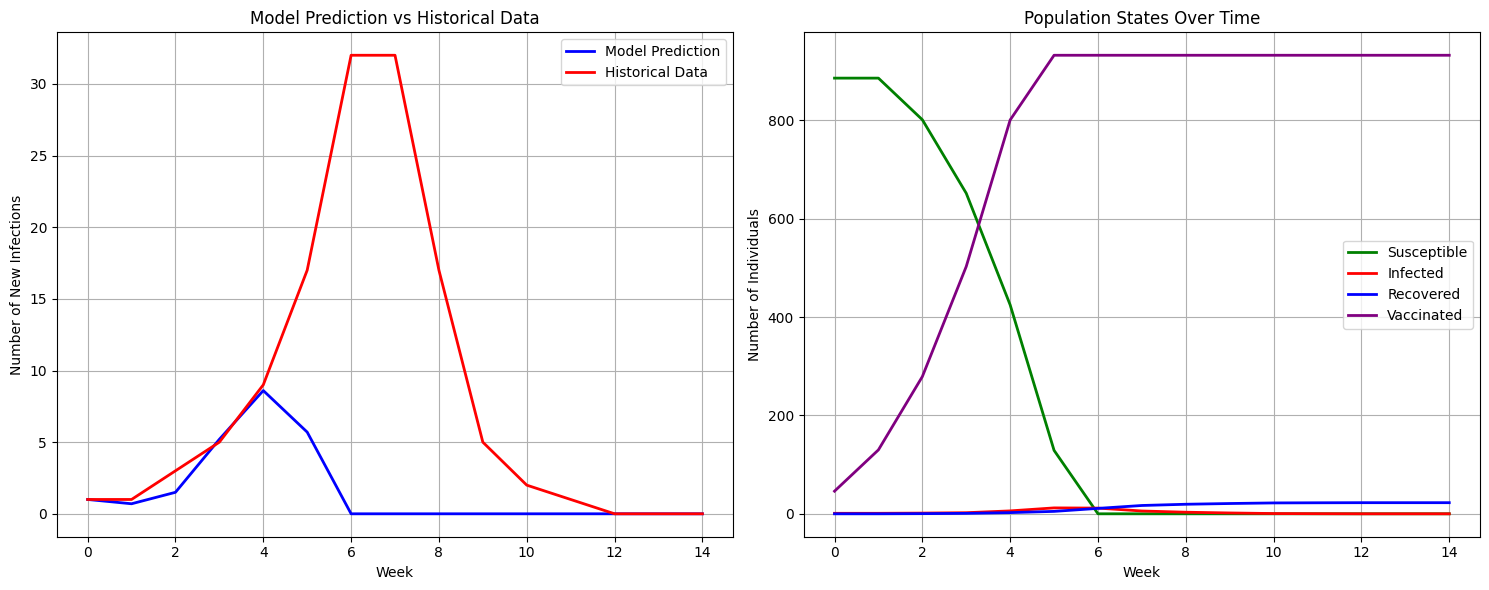

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def preferential_attachment(k, max_nodes):
    """Generate random graph using preferential attachment with target average degree k"""
    # Start with a complete graph of k+1 nodes
    G = nx.complete_graph(k + 1)
    c = k // 2  # Number of edges to add per new node

    # Add nodes until reaching max_nodes
    while len(G) < max_nodes:
        # Get current node degrees
        degrees = [d for _, d in G.degree()]
        # Calculate probabilities proportional to node degrees
        probs = np.array(degrees) / sum(degrees)

        # Add new node and connect to c existing nodes
        new_node = len(G)
        # Select nodes to connect to based on degree probabilities
        targets = np.random.choice(G.nodes(), size=c, replace=False, p=probs)
        G.add_node(new_node)
        G.add_edges_from([(new_node, target) for target in targets])

    return G

def infection(n, infected, G, beta):
    """Calculate if node n becomes infected based on infected neighbors"""
    # Count infected neighbors
    m = len([nn for nn in G.neighbors(n) if nn in infected])
    # Calculate infection probability
    p_inf = 1 - (1-beta)**m
    # Return infection result
    return np.random.random() < p_inf

def recovery(rho):
    """Calculate if infected node recovers"""
    return np.random.random() < rho


# Real infected per week
actually_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0]  # 15 weeks

# Updated vaccination percentage per week
vaccinated_perc = [5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60]  # 15 weeks

# Fixed simulation parameters
inf_0 = 1
N = 10  # number of simulations
weeks = 15  # changed from 16 to 15
n_nodes = 934

# Initial parameters to tune and relative deltas (unchanged)
k_0 = 10
beta_0 = 0.3
rho_0 = 0.6
delta_k_0 = 1
delta_beta_0 = 0.1
delta_rho_0 = 0.1

# Initialize results
best_rmse = float('inf')
best_n_new_inf = None
best_n_susc = None
best_n_inf = None
best_n_rec = None
best_n_vax = None

while True:
    # Initialize/Update parameters vectors
    k_params = [k_0-delta_k_0, k_0, k_0+delta_k_0]
    beta_params = [beta_0-delta_beta_0, beta_0, beta_0+delta_beta_0]
    rho_params = [rho_0-delta_rho_0, rho_0, rho_0+delta_rho_0]

    # For each parameter configuration
    for k in k_params:
        for beta in beta_params:
            for rho in rho_params:
                # Generate random graph with preferential attachment model
                G = preferential_attachment(k, n_nodes)

                # Initialize counters
                n_new_inf = []
                n_new_vax = []
                n_susc = []
                n_inf = []
                n_rec = []
                n_vax = []

                # Perform the simulation N times
                for i in range(N):
                    # Randomly sample inf_0 infected
                    first_inf = np.random.choice(G.nodes(), size=inf_0, replace=False)
                    # Initialize infected vectors
                    infected = first_inf
                    # Initialize recovered vector
                    recovered = []
                    # Initialize susceptible vector
                    susceptible = [n for n in G.nodes() if n not in infected and n not in recovered]
                    # Initialize vaccinable vector
                    vaccinable = [n for n in G.nodes()]
                    # Initialize vaccinated vector
                    vaccinated = []
                    # Initialize new infected and new recovered vectors
                    new_infected = []

                    # Handle first week
                    # Select nodes to vaccinate
                    num_vax = min(int(n_nodes*vaccinated_perc[0]/100), len(vaccinable))
                    new_vax = np.random.choice(list(vaccinable), size=num_vax, replace=False)
                    # Update vaccinated vector
                    vaccinated.extend(list(new_vax))
                    # Update susceptible and vaccinable
                    susceptible = [n for n in susceptible if n not in new_infected and n not in new_vax]
                    vaccinable = [n for n in vaccinable if n not in new_vax]
                    # Select node to infect
                    new_infected = np.random.choice(list(susceptible), size=actually_inf[0], replace=False)
                    # Update susceptible
                    susceptible = [n for n in susceptible if n not in new_infected]
                    # Update infected
                    infected = [n for n in (list(infected)+new_infected)]

                    # Count week 0 states
                    n_new_inf.append(len(new_infected))
                    n_susc.append(len(susceptible))
                    n_inf.append(len(infected))
                    n_rec.append(len(recovered))
                    n_new_vax.append(len(new_vax))
                    n_vax.append(len(vaccinated))

                    # Simulate remaining weeks
                    for ii in range(weeks-1):
                        new_infected = []
                        new_recovered = []

                        # Handle vaccination
                        num_vax = min(int(n_nodes*vaccinated_perc[ii+1]/100), len(vaccinable))
                        new_vax = np.random.choice(list(vaccinable), size=num_vax, replace=False)
                        vaccinated.extend(list(new_vax))

                        # Process infections
                        for n in susceptible:
                            if infection(n, infected, G, beta):
                                new_infected.append(n)

                        # Process recoveries
                        for n in infected:
                            if recovery(rho):
                                new_recovered.append(n)

                        # Count states
                        n_new_inf.append(len(new_infected))
                        n_susc.append(len(susceptible))
                        n_inf.append(len(infected))
                        n_rec.append(len(recovered))
                        n_new_vax.append(len(new_vax))
                        n_vax.append(len(vaccinated))

                        # Update states
                        infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
                        recovered.extend(new_recovered)
                        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered and n not in new_vax]
                        vaccinable = [n for n in vaccinable if n not in new_recovered and n not in new_vax]

                # Compute averages and RMSE
                avg_new_inf = np.mean(np.reshape(n_new_inf, (N,weeks)), axis=0)
                rmse = np.sqrt(1/15*np.sum((avg_new_inf-actually_inf)**2))

                # Update best results if RMSE improved
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_k, best_beta, best_rho = k, beta, rho
                    best_n_new_inf = n_new_inf.copy()
                    best_n_susc = n_susc.copy()
                    best_n_inf = n_inf.copy()
                    best_n_rec = n_rec.copy()
                    best_n_vax = n_vax.copy()

    # Check convergence
    if best_k == k_0 and best_beta == beta_0 and best_rho == rho_0:
        break
    else:
        # Update parameters for next iteration
        k_0 = best_k if best_k != k_0 else k_0
        beta_0 = best_beta if best_beta != beta_0 else beta_0
        rho_0 = best_rho if best_rho != rho_0 else rho_0

print(f'Lowest RMSE: {best_rmse} obtained with params: k = {best_k}, beta = {best_beta}, rho = {best_rho}')

# Calculate final averages
avg_new_inf = np.mean(np.reshape(best_n_new_inf,(N,weeks)),axis=0)
avg_susc = np.mean(np.reshape(best_n_susc,(N,weeks)),axis=0)
avg_inf = np.mean(np.reshape(best_n_inf,(N,weeks)),axis=0)
avg_rec = np.mean(np.reshape(best_n_rec,(N,weeks)),axis=0)
avg_vax = np.mean(np.reshape(best_n_vax,(N,weeks)),axis=0)

# Create visualization
plt.figure(figsize=(15, 6))

# Plot new infections vs actual
plt.subplot(1, 2, 1)
plt.plot(range(weeks), avg_new_inf, 'b-', linewidth=2, label='Model Prediction')
plt.plot(range(weeks), actually_inf, 'r-', linewidth=2, label='Historical Data')
plt.xlabel('Week')
plt.ylabel('Number of New Infections')
plt.title('Model Prediction vs Historical Data')
plt.grid(True)
plt.legend()

# Plot population states
plt.subplot(1, 2, 2)
plt.plot(range(weeks), avg_susc, 'g-', linewidth=2, label='Susceptible')
plt.plot(range(weeks), avg_inf, 'r-', linewidth=2, label='Infected')
plt.plot(range(weeks), avg_rec, 'b-', linewidth=2, label='Recovered')
plt.plot(range(weeks), avg_vax, 'purple', linewidth=2, label='Vaccinated')
plt.xlabel('Week')
plt.ylabel('Number of Individuals')
plt.title('Population States Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()  # Display the plots

# Save the plots
plt.savefig('Ex1_4.svg', dpi=180)
plt.savefig('Ex1_4a.svg', dpi=180)
plt.savefig('Ex1_4b.svg', dpi=180)
plt.close()

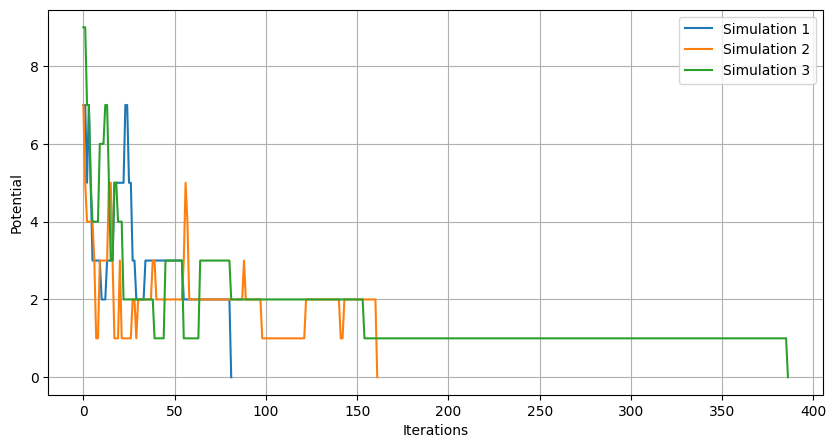

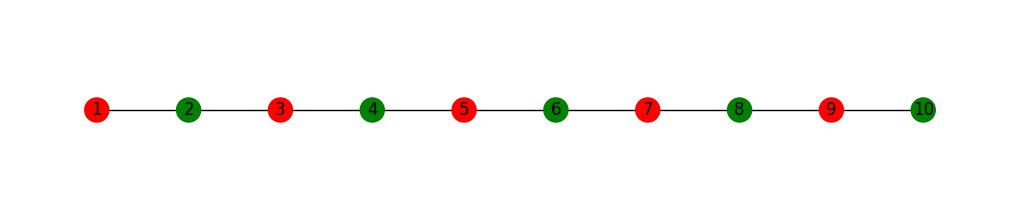

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add 10 nodes to the graph
G.add_nodes_from(range(1, 11))

# Add edges between the nodes to create a line graph
for i in range(9):
    G.add_edge(i+1, i+2)

# Define possible states
states = ('red', 'green')

# Set the state of each node to "red"
for node in G.nodes():
    G.nodes[node]['state'] = 'red'

# Draw initial state
plt.figure(figsize=(10, 2))
nx.draw(G, with_labels=True, pos={n:[n,0] for n in list(G.nodes)},
        node_color=list(nx.get_node_attributes(G,'state').values()))
plt.savefig('Ex2_1a.svg', dpi=180)
plt.close()

# Define the potential function
def potential(G):
    """Calculate potential U(t) = 1/2 ∑i,j∈V Wij c(Xi(t), Xj(t))"""
    potential = 0
    W = nx.adjacency_matrix(G).toarray()

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            # Cost is 1 if states are same, 0 otherwise
            cost = int(G.nodes[i+1]['state'] == G.nodes[j+1]['state'])
            potential += W[i][j] * cost

    return potential/2

# Compute the adjacency matrix
W = nx.adjacency_matrix(G).toarray()

# Plot for multiple simulations
plt.figure(figsize=(10, 5))

# Repeat the simulation 3 times
for sim in range(3):
    # Initialize the potentials vector
    potentials = []

    # Reset initial state to all red
    for node in G.nodes():
        G.nodes[node]['state'] = 'red'

    # Initialize time variable
    t = 0

    # Simulate until potential reaches 0
    while True:
        # Randomly choose node to update
        node_to_update = np.random.choice(list(G.nodes))

        # Calculate probabilities for each possible state
        probabilities = []
        for state in states:
            # Calculate sum of costs with neighbors for this state
            sum_costs = 0
            for neighbor in G.neighbors(node_to_update):
                # Cost is 1 if states match, 0 otherwise
                cost = 1 if state == G.nodes[neighbor]['state'] else 0
                sum_costs += cost

            # Calculate exponential term with correct noise η(t) = t/50
            prob = np.exp(-1 * (t/50) * sum_costs)
            probabilities.append(prob)

        # Normalize probabilities
        probabilities = np.array(probabilities)
        probabilities = probabilities / np.sum(probabilities)

        # Choose new state according to probabilities
        new_state = np.random.choice(states, p=probabilities)

        # Update node state
        G.nodes[node_to_update]['state'] = new_state

        # Record current potential
        current_potential = potential(G)
        potentials.append(current_potential)

        # Check if solution found
        if current_potential == 0:
            break

        t += 1

    # Plot potential evolution for this simulation
    plt.plot(range(len(potentials)), potentials, label=f'Simulation {sim+1}')

plt.xlabel('Iterations')
plt.ylabel('Potential')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Ex2_1b.svg', dpi=180)
plt.close()

# Draw final state
plt.figure(figsize=(10, 2))
nx.draw(G, with_labels=True, pos={n:[n,0] for n in list(G.nodes)},
        node_color=list(nx.get_node_attributes(G,'state').values()))
plt.show()
plt.savefig('Ex2_1c.svg', dpi=180)
plt.close()

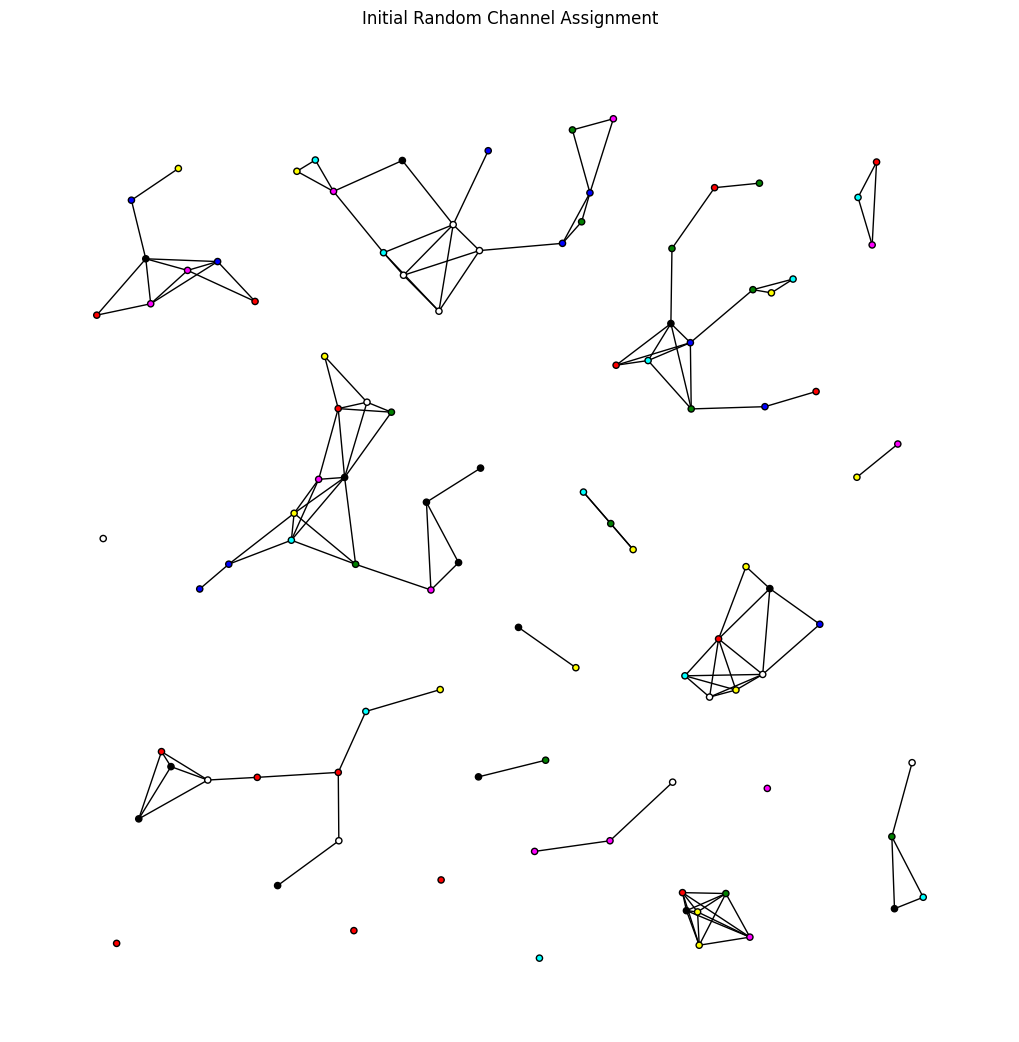

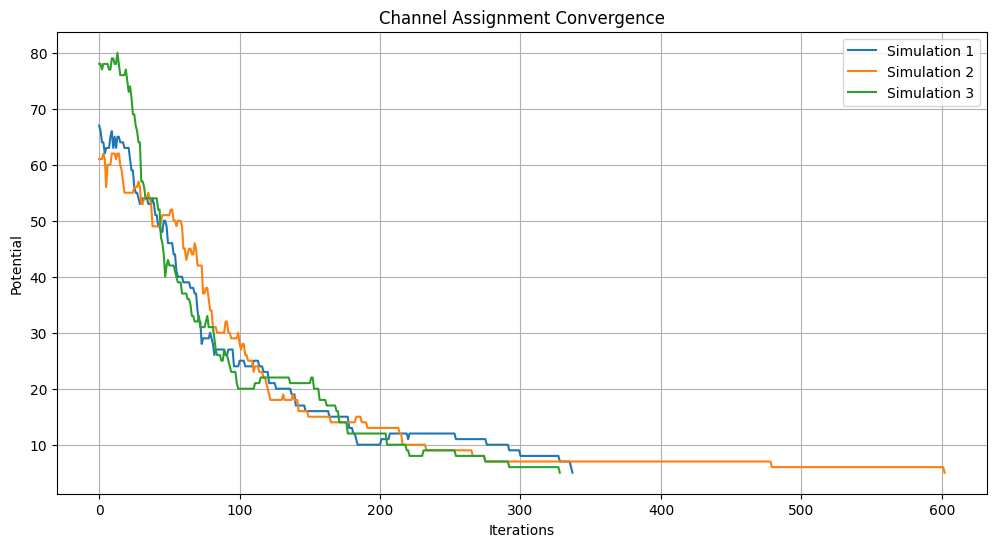

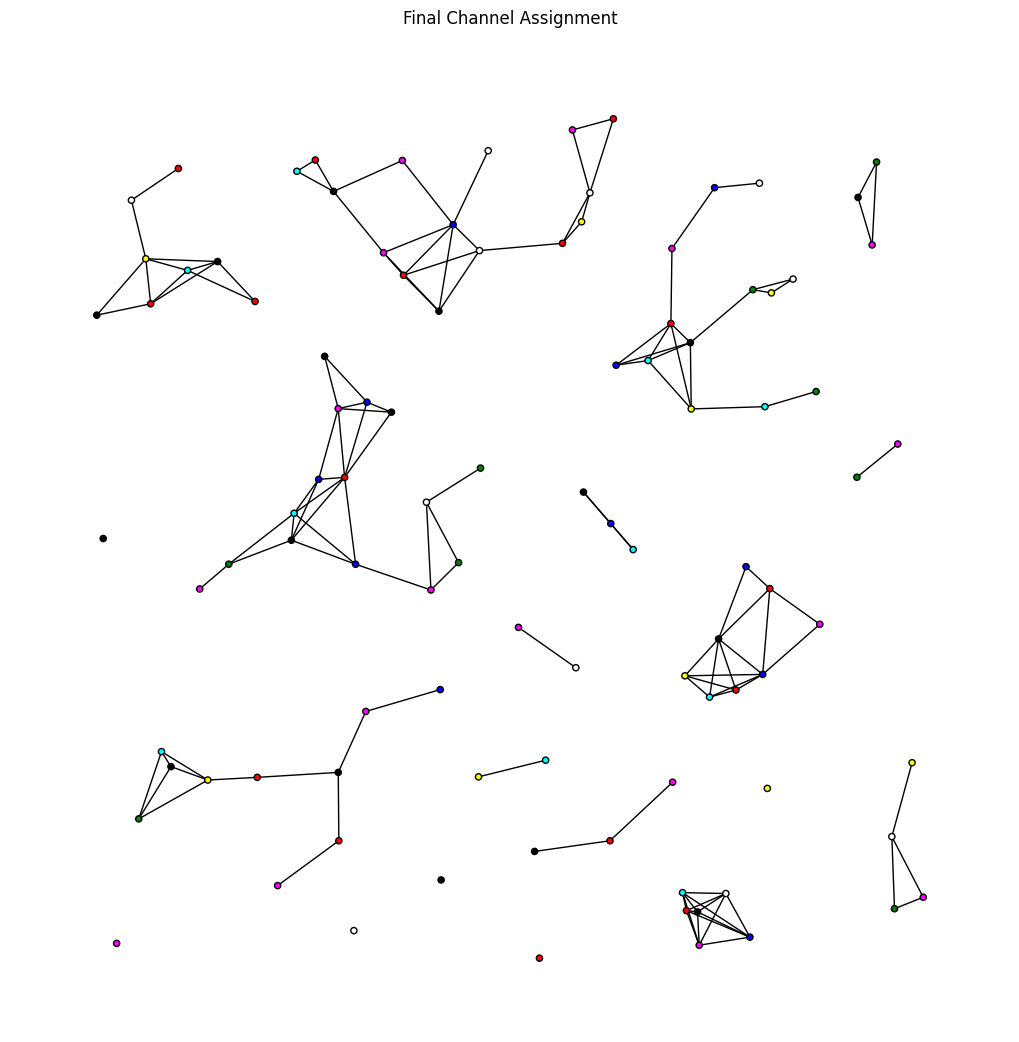

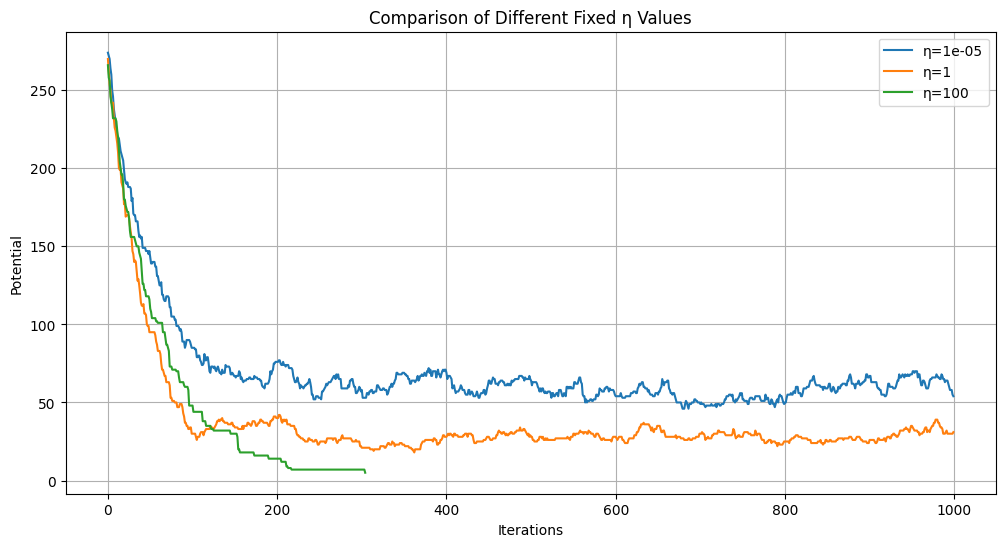

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import loadmat

def softmax(v):
    """Compute softmax values for vector v"""
    e = np.exp(v)
    if np.sum(e) == 0:
        return [1/len(v) for _ in v]
    return e/np.sum(e)

def cost(a, b):
    """Cost function for channel assignment
    2 if same channel, 1 if adjacent, 0 otherwise"""
    if a == b:
        return 2
    elif abs(a-b) == 1:
        return 1
    else:
        return 0

def potential(G):
    """Calculate potential function for the graph"""
    res = 0
    W = nx.adjacency_matrix(G).toarray()
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            res += W[i][j] * cost(G.nodes[i]['state'], G.nodes[j]['state'])
    return res/2

# Load network data using scipy
wifi_data = loadmat('wifi.mat')
coords_data = loadmat('coords.mat')  # Fixed filename

# Extract matrices from the loaded data
W = wifi_data['wifi']  # Use the variable name from the .mat file
C = coords_data['coords']  # Fixed variable name

# Create graph from adjacency matrix using the correct function
G = nx.from_numpy_array(W, create_using=nx.Graph)

# Add coordinates to nodes
for i, n in enumerate(G.nodes):
    G.nodes[n]['coord'] = list(C[i])

# Define states (channels/colors)
states = list(range(1, 9))
states_names = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white', 'black']

# Draw initial random configuration
plt.figure(figsize=(10, 10))
for node in G.nodes():
    G.nodes[node]['state'] = np.random.choice(states)
nx.draw(G, pos=nx.get_node_attributes(G, 'coord'), with_labels=False,
        node_color=[states_names[i-1] for i in list(nx.get_node_attributes(G, 'state').values())],
        node_size=20, node_shape='o')
plt.gca().collections[0].set_edgecolor('#000000')
plt.title('Initial Random Channel Assignment')
plt.show()
plt.savefig('Ex2_2a.svg', dpi=180)
plt.close()

# Simulate channel assignment with η(t) = t/50
plt.figure(figsize=(12, 6))

for iteration in range(3):
    # Reset initial states
    for node in G.nodes():
        G.nodes[node]['state'] = np.random.choice(states)

    potentials = []
    t = 0

    while True:
        # Select random node
        to_switch = np.random.choice(list(G.nodes))

        # Calculate probabilities for each state
        probs = []
        for state in states:
            # Calculate cost with all neighbors
            total_cost = 0
            for neighbor in G.neighbors(to_switch):
                total_cost += cost(state, G.nodes[neighbor]['state'])
            probs.append(total_cost)

        # Apply noise and softmax
        probs = [-x * (t/50) for x in probs]  # Using η(t) = t/50
        probs = softmax(probs)

        # Update state
        new_state = np.random.choice(states, p=probs)
        G.nodes[to_switch]['state'] = new_state

        # Record potential
        current_potential = potential(G)
        potentials.append(current_potential)

        # Check convergence
        if current_potential <= 5 or t > 700:  # Allow some remaining conflicts
            break

        t += 1

    plt.plot(range(len(potentials)), potentials, label=f'Simulation {iteration+1}')

plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Potential')
plt.title('Channel Assignment Convergence')
plt.legend()
plt.show()
plt.savefig('Ex2_2b.svg', dpi=180)
plt.close()

# Draw final configuration
plt.figure(figsize=(10, 10))
nx.draw(G, pos=nx.get_node_attributes(G, 'coord'), with_labels=False,
        node_color=[states_names[i-1] for i in list(nx.get_node_attributes(G, 'state').values())],
        node_size=20, node_shape='o')
plt.gca().collections[0].set_edgecolor('#000000')
plt.title('Final Channel Assignment')
plt.show()
plt.savefig('Ex2_2c.svg', dpi=180)
plt.close()

# Optional part - testing different η values
plt.figure(figsize=(12, 6))

# Test constant η values
for eta in [1e-5, 1, 100]:
    # Reset initial states
    for node in G.nodes():
        G.nodes[node]['state'] = 1

    potentials = []
    for _ in range(1000):
        to_switch = np.random.choice(list(G.nodes))

        probs = []
        for state in states:
            total_cost = 0
            for neighbor in G.neighbors(to_switch):
                total_cost += cost(state, G.nodes[neighbor]['state'])
            probs.append(total_cost)

        probs = [-x * eta for x in probs]
        probs = softmax(probs)

        new_state = np.random.choice(states, p=probs)
        G.nodes[to_switch]['state'] = new_state
        potentials.append(potential(G))

        if potentials[-1] <= 5:
            break

    plt.plot(range(len(potentials)), potentials, label=f'η={eta}')

plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Potential')
plt.title('Comparison of Different Fixed η Values')
plt.legend()
plt.show()
plt.savefig('Ex2_2d.svg', dpi=180)
plt.close()